In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
poll_data = pd.read_csv('../../data/mlcourse_open_first_survey_parsed.csv', index_col='id')

In [4]:
poll_data.head(2)

,id,Timestamp,Представьтесь в 2-3 фразах,Работали ли Вы с Jupyter notebooks?,Что Вы ждете от курса?,Потом мы прямо этот же набор данных поанализируем с Pandas. Так что какой Ваш любимый вид спорта?,"Ладно, посерьезней: согласны ли Вы на обработку персональных данных?","Какие оцениваете свой уровень математической подготовки? (матан, линал, теорвер)","Чему равна дисперсия равномерного на [0,6] распределения?","Найдите минимум функции 3x^4-8x^3+6x^2-12 на отрезке [-3,3]",Сколько параметров у нормального распределения?,Сможете написать на Python генератор чисел Фибоначчи?,"Хорошо, а готовы к началу курса (6 сентября 2017) освоить азы Python? На уровне Code Academy, DataCamp или github.com/Yorko/python_intro",Оцените свой уровень владения GitHub,"Посоветуйте хороший фильм в стиле ""Игра в имитацию"" :)"
0,0,2016/12/05 10:39:59 am GMT+3,крутой Developer,Да,"Ребята, вижу ваш настрой, уверен курс будет ин...",Starcraft,Да,4,3,-12,2.0,Да,Да,Проф,"Прочитай книгу Лема ""Голос Неба"", очень много ..."
1,1,2016/12/05 10:44:27 am GMT+3,Разработчик Navision. Изучаю тему DS для возмо...,Да,"Практики, подкрепленной теорией. Хочется упоря...",NaN,Да,1,3,NaN,2.0,"Да, но фиговый.",Да,Могу скачать материалы,NaN


In [7]:
poll_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2944 entries, 0 to 3215
Data columns (total 14 columns):
Timestamp                                                                                                                                   2944 non-null object
Представьтесь в 2-3 фразах                                                                                                                  2944 non-null object
Работали ли Вы с Jupyter notebooks?                                                                                                         2931 non-null object
Что Вы ждете от курса?                                                                                                                      2944 non-null object
Потом мы прямо этот же набор данных поанализируем с Pandas. Так что какой Ваш любимый вид спорта?                                           2640 non-null object
Ладно, посерьезней: согласны ли Вы на обработку персональных данных?                    

In [8]:
poll_data.shape

(2944, 14)

In [13]:
rename_dic = dict(zip(poll_data.columns,
                     ['time', 'intro', 'jupyter', 'expect',
                      'sport', 'personal', 'math_level', 'quest1',
                      'quest2', 'quest3', 'fib_gen', 'python',
                      'github', 'movie']))

In [16]:
poll_data.rename(columns=rename_dic, inplace=True)

In [17]:
poll_data.head(2)

,time,intro,jupyter,expect,sport,personal,math_level,quest1,quest2,quest3,fib_gen,python,github,movie
id,,,,,,,,,,,,,,
0,2016/12/05 10:39:59 am GMT+3,крутой Developer,Да,"Ребята, вижу ваш настрой, уверен курс будет ин...",Starcraft,Да,4,3,-12,2.0,Да,Да,Проф,"Прочитай книгу Лема ""Голос Неба"", очень много ..."
1,2016/12/05 10:44:27 am GMT+3,Разработчик Navision. Изучаю тему DS для возмо...,Да,"Практики, подкрепленной теорией. Хочется упоря...",NaN,Да,1,3,NaN,2.0,"Да, но фиговый.",Да,Могу скачать материалы,NaN


In [19]:
poll_data['jupyter'].value_counts().head()

Да                                                              2071
Нет                                                              766
немного                                                            7
Немного                                                            3
Немного,  недавно начал проходить курс от яндекса на курсоре       2
Name: jupyter, dtype: int64

In [26]:
#poll_data['jupyter'].map({'Да': 1, 'Нет': 0}).unique()
jupyter_levels = poll_data['jupyter'].map({'Да': 1, 'Нет': 0}).fillna(2)

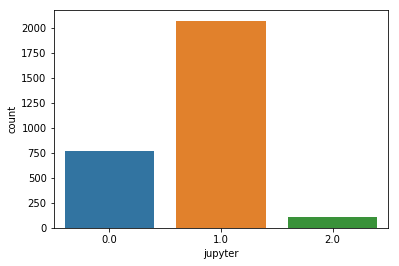

In [27]:
sns.countplot(jupyter_levels);

In [28]:
poll_data.columns

Index(['time', 'intro', 'jupyter', 'expect', 'sport', 'personal', 'math_level',
       'quest1', 'quest2', 'quest3', 'fib_gen', 'python', 'github', 'movie'],
      dtype='object')

In [30]:
poll_data.sport.value_counts().head()

Футбол       197
футбол       113
Баскетбол    113
Плавание      94
Хоккей        66
Name: sport, dtype: int64

In [46]:
(poll_data['quest3'] == 2).dropna().sum() / poll_data.dropna().shape[0]

1.3623580313683072

In [53]:
print((poll_data['quest3'] == 2).dropna().sum() /
      poll_data['quest3'][-poll_data['quest3'].isnull()].shape[0])

0.924403669725


In [68]:
all_words = np.concatenate(poll_data['intro'].apply(lambda s: s.strip().split()).values)

In [69]:
len(all_words)

26533

In [73]:
!pip3 install nltk

  Running setup.py install for nltk: started
    Running setup.py install for nltk: finished with status 'done'


In [77]:
from nltk.corpus import stopwords

In [78]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\degid\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [79]:
stopwords.words('russian')

['и',
 'в',
 'во',
 'не',
 'что',
 'он',
 'на',
 'я',
 'с',
 'со',
 'как',
 'а',
 'то',
 'все',
 'она',
 'так',
 'его',
 'но',
 'да',
 'ты',
 'к',
 'у',
 'же',
 'вы',
 'за',
 'бы',
 'по',
 'только',
 'ее',
 'мне',
 'было',
 'вот',
 'от',
 'меня',
 'еще',
 'нет',
 'о',
 'из',
 'ему',
 'теперь',
 'когда',
 'даже',
 'ну',
 'вдруг',
 'ли',
 'если',
 'уже',
 'или',
 'ни',
 'быть',
 'был',
 'него',
 'до',
 'вас',
 'нибудь',
 'опять',
 'уж',
 'вам',
 'ведь',
 'там',
 'потом',
 'себя',
 'ничего',
 'ей',
 'может',
 'они',
 'тут',
 'где',
 'есть',
 'надо',
 'ней',
 'для',
 'мы',
 'тебя',
 'их',
 'чем',
 'была',
 'сам',
 'чтоб',
 'без',
 'будто',
 'чего',
 'раз',
 'тоже',
 'себе',
 'под',
 'будет',
 'ж',
 'тогда',
 'кто',
 'этот',
 'того',
 'потому',
 'этого',
 'какой',
 'совсем',
 'ним',
 'здесь',
 'этом',
 'один',
 'почти',
 'мой',
 'тем',
 'чтобы',
 'нее',
 'сейчас',
 'были',
 'куда',
 'зачем',
 'всех',
 'никогда',
 'можно',
 'при',
 'наконец',
 'два',
 'об',
 'другой',
 'хоть',
 'после',
 'на

In [84]:
words_series = pd.Series(list(all_words))
words_series[-words_series.isin(
    stopwords.words('russian'))].value_counts().head(10)


Студент     279
Работаю     201
курса       187
данных      178
Data        173
Я           166
работаю     157
data        130
машинным    123
хочу        122
dtype: int64

In [ ]:
!pip3 in